In [296]:
#Car Sales
#Link to source: https://www.kaggle.com/datasets/pratyushpuri/used-car-sales-listings-dataset-2025

In [297]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [298]:
df = pd.read_csv("data/used_car_listings.csv")

In [299]:
df.head()

,listing_id,vin,make,model,year,trim,body_type,fuel_type,transmission,mileage,price,condition,location,seller_type,features
0,1,9M6LF68V634LY2252,Tesla,Model 3,2019,NaN,Coupe,Electric,Manual,46134,19919.0,good,"New Lindsey, GA, US",Dealer,"Alloy Wheels, Android Auto, Apple CarPlay, Fog..."
1,2,1S0ZCY536BSCY2864,Nissan,Rogue,2024,LT,Sedan,Hybrid,Automatic,16109,19480.0,good,"Pughtown, CO, US",Dealer,"Alloy Wheels, Android Auto, Lane Keep Assist, ..."
2,3,YFB625BN0RTMZ5590,Hyundai,i20,2018,XLE,Crossover,Petrol,Automatic,173239,4556.0,good,"Satna, HR, India",Dealer,"Alloy Wheels, Bluetooth, Panoramic Roof, Sunroof"
3,4,CPMZ4RFN5WYL37096,Kia,Sportage,2023,EX,Hatchback,Diesel,CVT,36810,11536.0,fair,"山武市, Osaka, Japan",Certified Pre-Owned,"Alloy Wheels, Bluetooth, Keyless Entry, Naviga..."
4,5,4PJZG3MV6D9365673,Kia,Seltos,2020,Trend,Pickup,Diesel,Automatic,87749,14098.0,good,"長生郡長生村, Osaka, Japan",Certified Pre-Owned,"Apple CarPlay, Backup Camera, Bluetooth, Heate..."


In [300]:
df.columns


Index(['listing_id', 'vin', 'make', 'model', 'year', 'trim', 'body_type',
       'fuel_type', 'transmission', 'mileage', 'price', 'condition',
       'location', 'seller_type', 'features'],
      dtype='object')

In [301]:
#Checking if we have duplicated vins 
df.duplicated('vin').sum()

0

In [302]:
df = df[[#'listing_id', 'vin', 
    'make', 'model',
    'year', 'trim', 'body_type',
    'fuel_type', 'transmission', 'mileage', 'price', 'condition',
    'location', 'seller_type', 'features']].copy()

df.shape

(2068, 13)

In [303]:
df.dtypes

make             object
model            object
year              int64
trim             object
body_type        object
fuel_type        object
transmission     object
mileage           int64
price           float64
condition        object
location         object
seller_type      object
features         object
dtype: object

In [304]:
df.describe()

,year,mileage,price
count,2068.000000,2068.000000,2068.000000
mean,2016.975822,115626.364603,9182.621857
std,4.610981,80971.112603,9964.093618
min,2005.000000,0.000000,1140.000000
25%,2014.000000,57683.250000,2323.750000
50%,2017.000000,99212.000000,5448.500000
75%,2020.000000,159291.500000,11946.750000
max,2025.000000,418428.000000,72641.000000


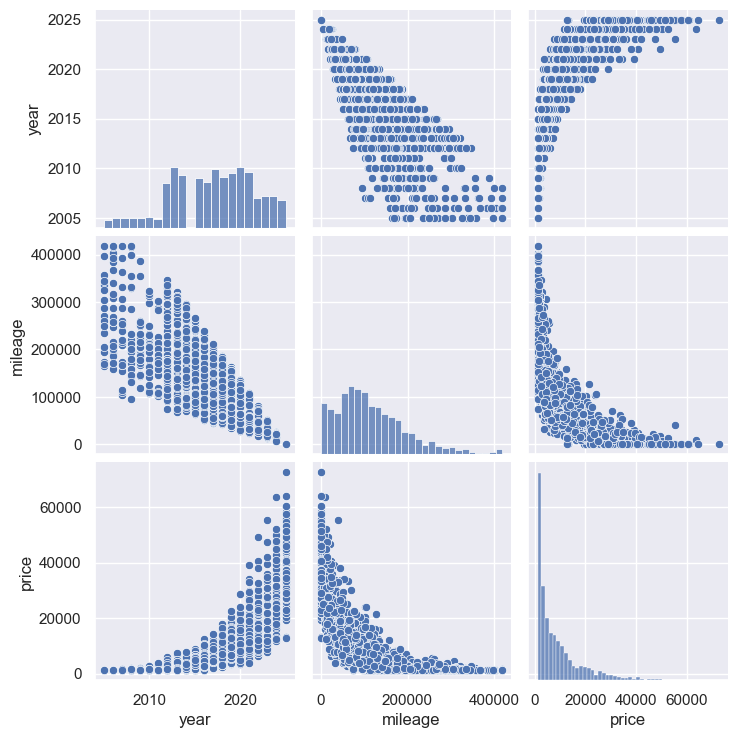

In [305]:
sns.pairplot((df))

In [306]:
df.isna().sum()

make              0
model             0
year              0
trim            244
body_type         0
fuel_type         0
transmission      0
mileage           0
price             0
condition        46
location          0
seller_type       0
features        151
dtype: int64

In [307]:
df.loc[df.duplicated()]

,make,model,year,trim,body_type,fuel_type,transmission,mileage,price,condition,location,seller_type,features


In [308]:
df['year'].value_counts()

year
2013    174
2020    173
2017    167
2021    161
2019    158
2014    151
2018    144
2015    142
2016    132
2012    128
2023     92
2024     90
2022     86
2025     79
2010     30
2006     29
2008     29
2007     28
2009     27
2011     25
2005     23
Name: count, dtype: int64

In [309]:
df['year'].value_counts()

year
2013    174
2020    173
2017    167
2021    161
2019    158
2014    151
2018    144
2015    142
2016    132
2012    128
2023     92
2024     90
2022     86
2025     79
2010     30
2006     29
2008     29
2007     28
2009     27
2011     25
2005     23
Name: count, dtype: int64

<Axes: xlabel='year', ylabel='count'>

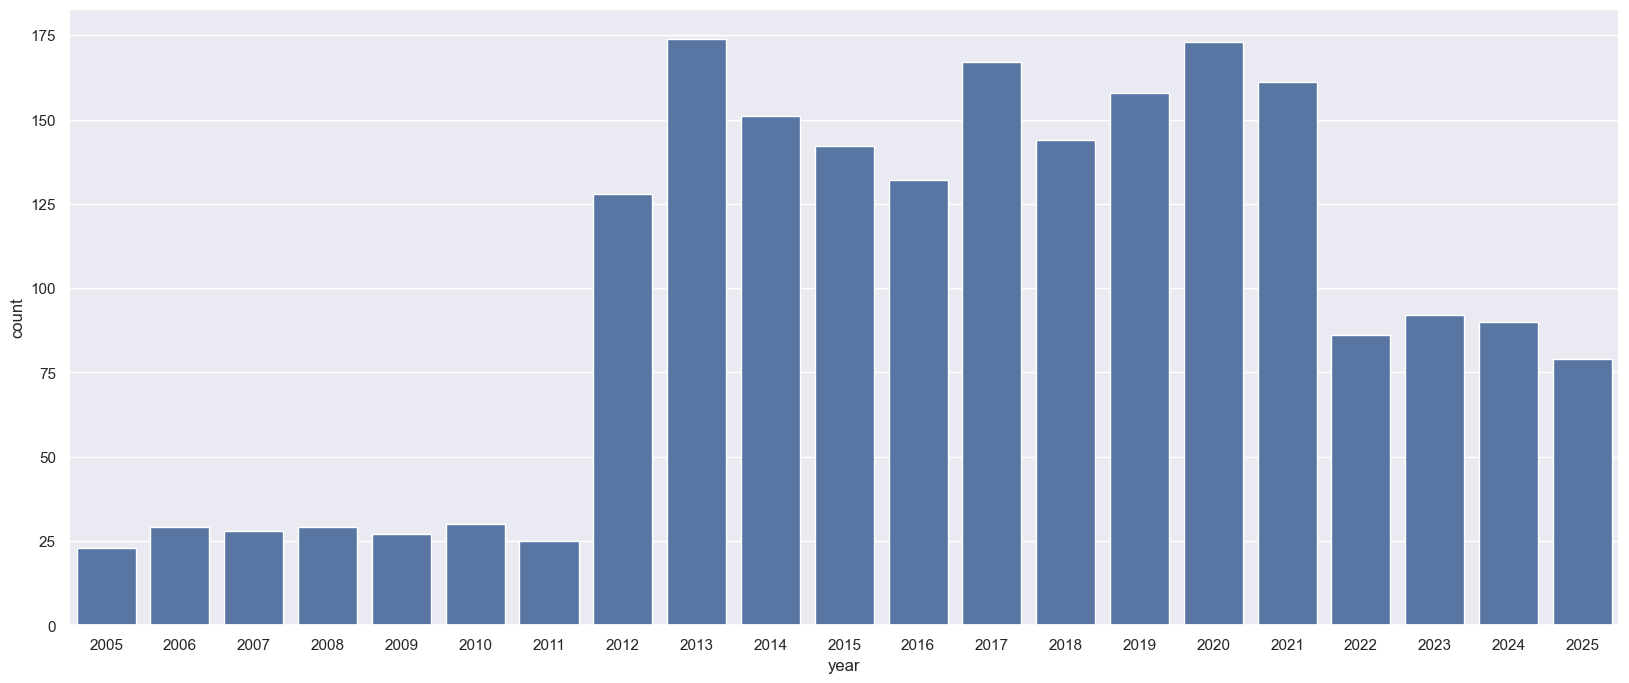

In [310]:
sns.countplot(x="year", data=df)  

In [311]:
df.query("year>2012")

,make,model,year,trim,body_type,fuel_type,transmission,mileage,price,condition,location,seller_type,features
0,Tesla,Model 3,2019,NaN,Coupe,Electric,Manual,46134,19919.0,good,"New Lindsey, GA, US",Dealer,"Alloy Wheels, Android Auto, Apple CarPlay, Fog..."
1,Nissan,Rogue,2024,LT,Sedan,Hybrid,Automatic,16109,19480.0,good,"Pughtown, CO, US",Dealer,"Alloy Wheels, Android Auto, Lane Keep Assist, ..."
2,Hyundai,i20,2018,XLE,Crossover,Petrol,Automatic,173239,4556.0,good,"Satna, HR, India",Dealer,"Alloy Wheels, Bluetooth, Panoramic Roof, Sunroof"
3,Kia,Sportage,2023,EX,Hatchback,Diesel,CVT,36810,11536.0,fair,"山武市, Osaka, Japan",Certified Pre-Owned,"Alloy Wheels, Bluetooth, Keyless Entry, Naviga..."
4,Kia,Seltos,2020,Trend,Pickup,Diesel,Automatic,87749,14098.0,good,"長生郡長生村, Osaka, Japan",Certified Pre-Owned,"Apple CarPlay, Backup Camera, Bluetooth, Heate..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2063,Skoda,Kushaq,2023,Sport,Pickup,Petrol,Automatic,24566,34696.0,like new,"Shahjahanpur, KA, India",Certified Pre-Owned,"Blind Spot Monitor, Keyless Entry, Panoramic R..."
2064,Mahindra,Scorpio,2016,XSE,SUV,Diesel,Automatic,122459,2642.0,excellent,"Marques, PR, Brazil",Dealer,"Adaptive Cruise Control, Backup Camera, LED He..."
2065,Audi,A6,2018,EX,Hatchback,Diesel,DCT,120452,7093.0,good,"Dhanbad, KL, India",Private Party,"Adaptive Cruise Control, Android Auto, Blind S..."
2066,Skoda,Kushaq,2021,LX,MPV,Petrol,Manual,57043,11296.0,excellent,"Caitlinstad, NL, Canada",Certified Pre-Owned,"Backup Camera, Panoramic Roof, Parking Sensors..."


<Axes: title={'center': 'Top 10 Years of Cars'}, xlabel='year', ylabel='count'>

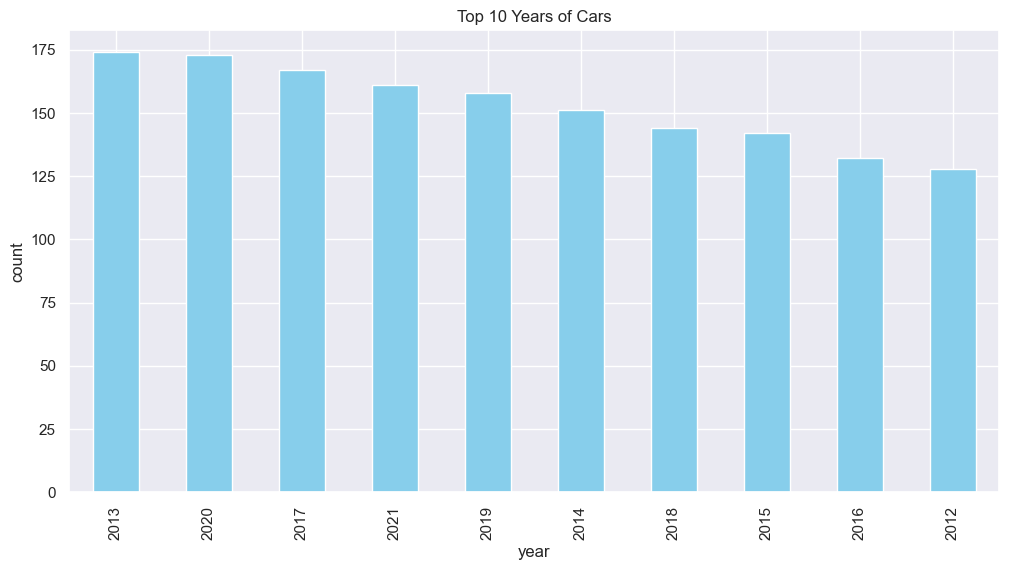

In [312]:
df['year'].value_counts()\
    .head(10)\
    .plot(kind='bar', figsize=(12, 6), color='skyblue',title="Top 10 Years of Cars",ylabel="count")

<Axes: title={'center': 'Price Distribution'}, xlabel='price', ylabel='Frequency'>

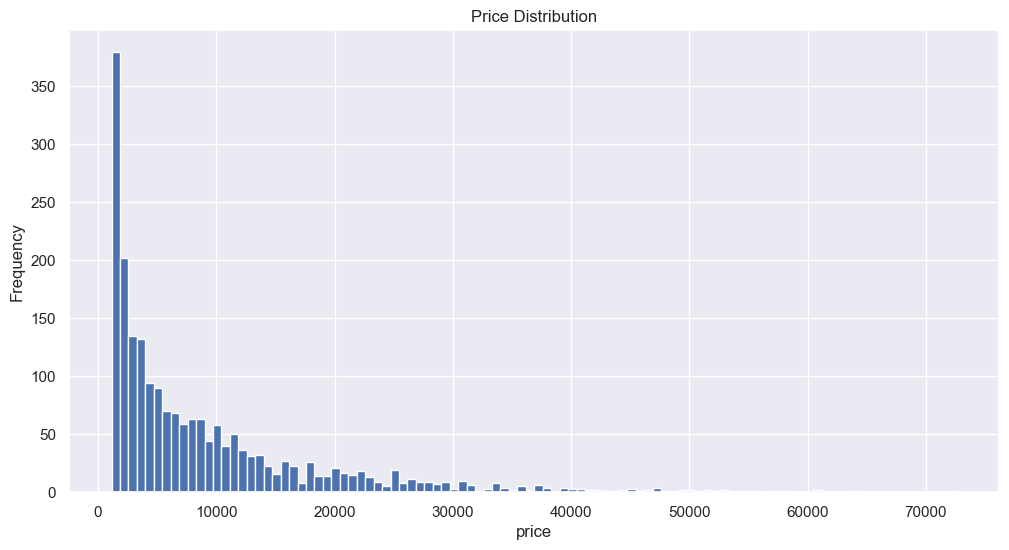

In [313]:
df["price"].plot(kind='hist', figsize=(12, 6), title="Price Distribution",bins=100,xlabel="price")

<Axes: title={'center': 'Price Distribution'}, ylabel='Density'>

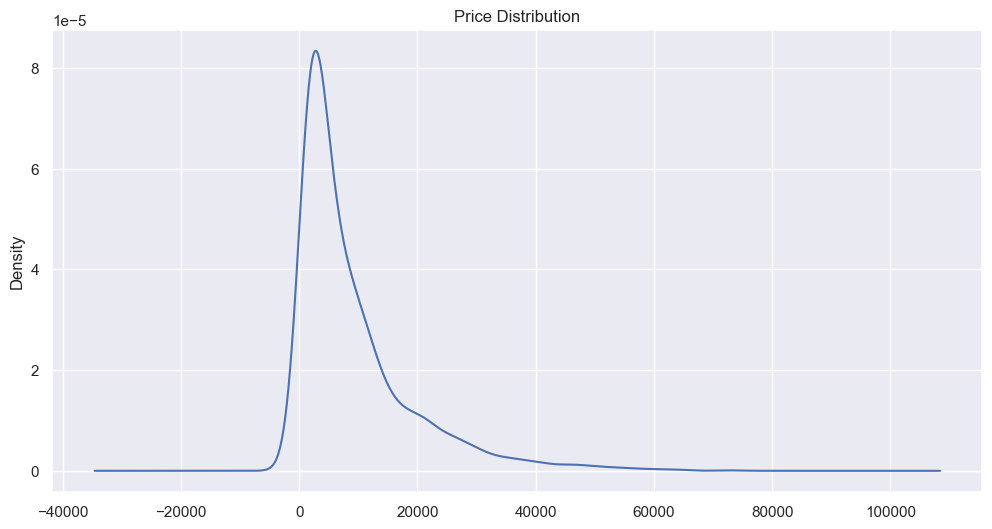

In [314]:
df["price"].plot(kind='kde', figsize=(12, 6), title="Price Distribution",xlabel="price",)

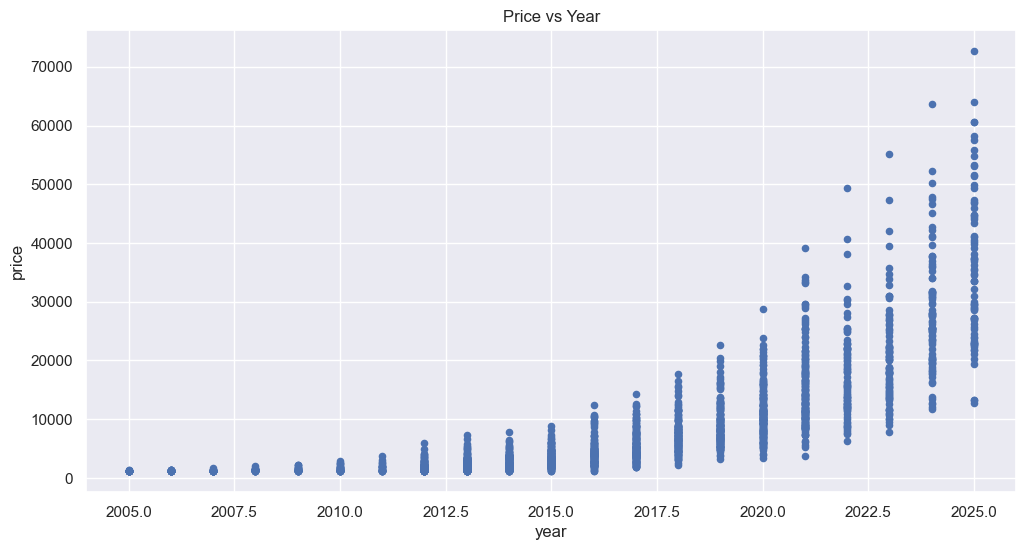

In [315]:
df.plot(kind="scatter",x='year',y='price', figsize=(12, 6), title="Price vs Year",xlabel="year",ylabel="price")
plt.show()

<Axes: xlabel='year', ylabel='price'>

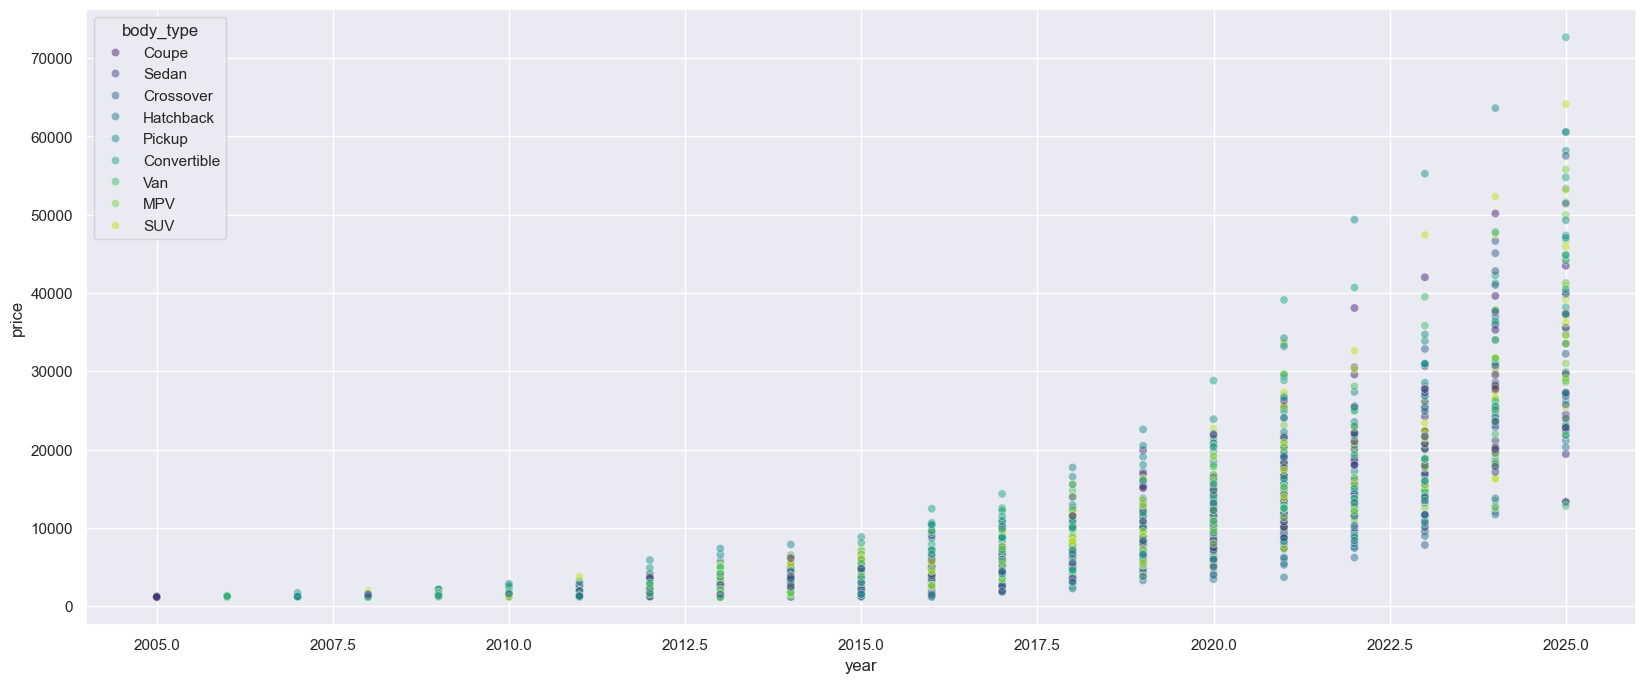

In [316]:
sns.scatterplot(data=df, x='year', y='price', hue='body_type', alpha=0.5, palette='viridis')

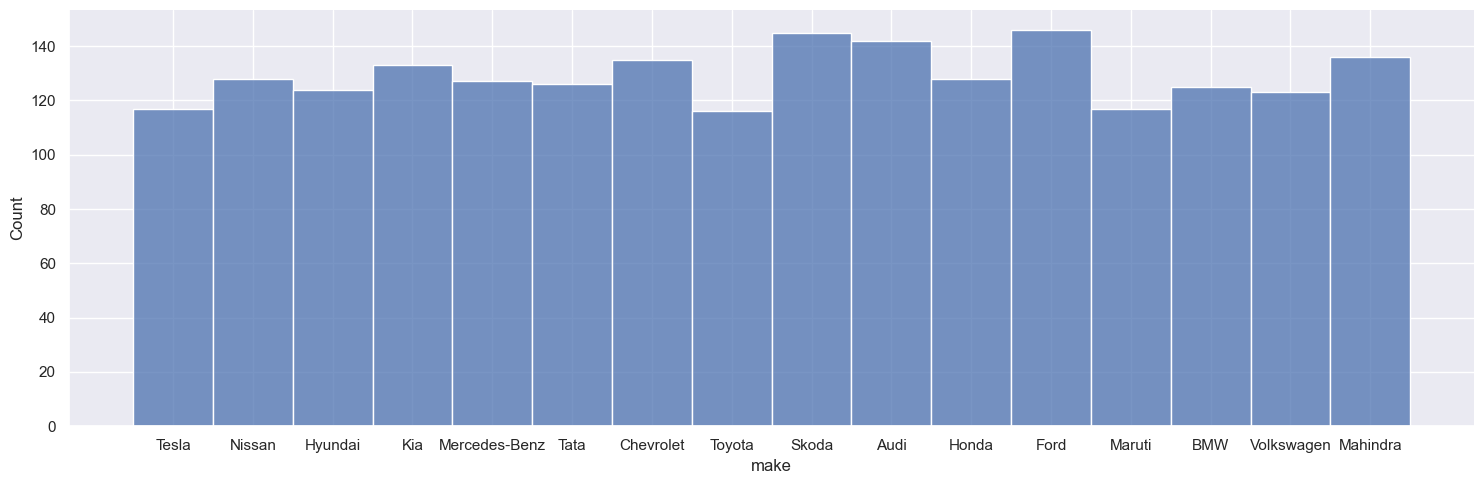

In [317]:
sns.displot(data=df, x='make',aspect=3)
#I cannot see any relationship between make and the chance of being sold,  i could look for a model

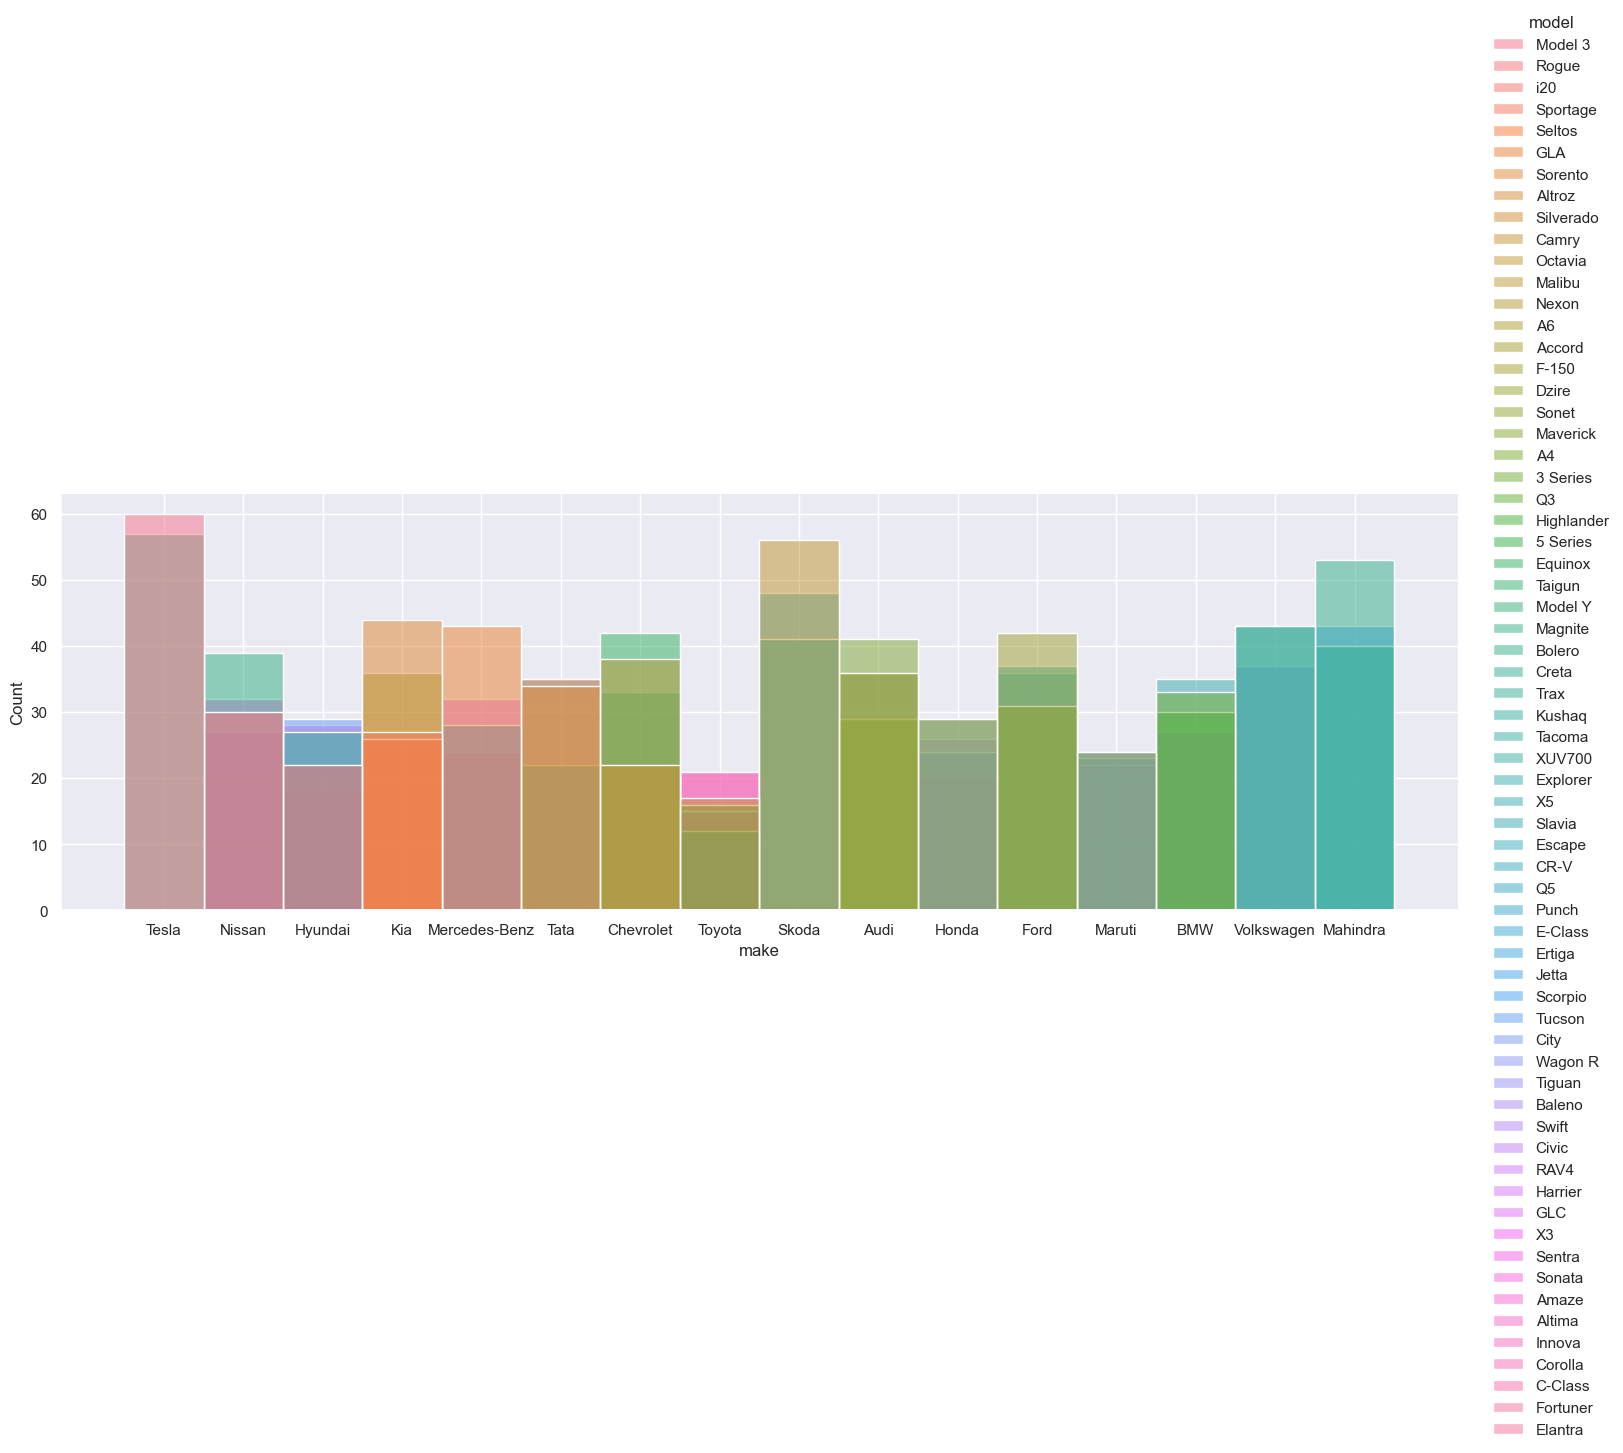

In [318]:
sns.displot(data=df, x='make', hue='model', aspect=3)

In [319]:
df_corr=df[["year","price","mileage"]].corr()

<Axes: >

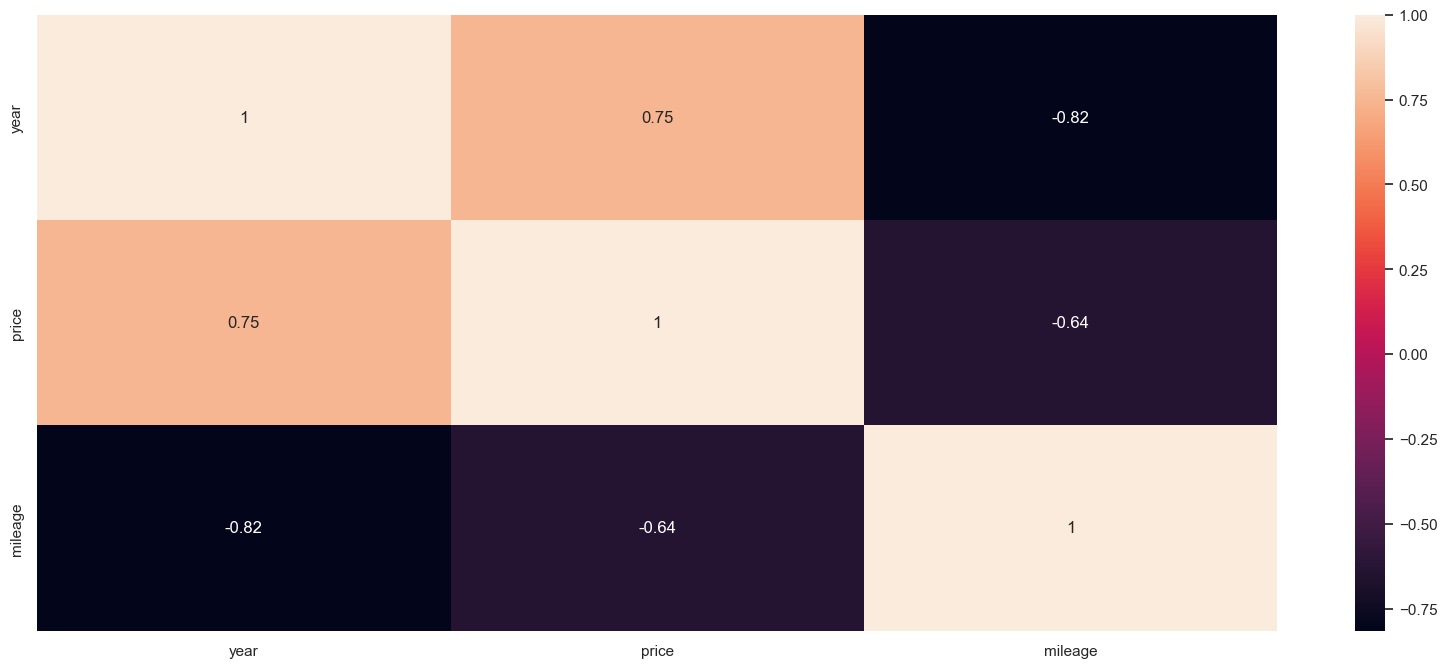

In [320]:
sns.heatmap(df_corr, annot=True)

### Interesitng Query questions: My favorite brand is Porsche is there any? if not what is the cheapest car in average to buy

In [321]:
df.query("make=='Porsche'")

,make,model,year,trim,body_type,fuel_type,transmission,mileage,price,condition,location,seller_type,features


In [322]:
df["price"].rank(method='dense',ascending=True).sort_values(ascending=True)

809        1.0
2013       2.0
386        2.0
269        3.0
1868       4.0
         ...  
1927    1879.0
225     1880.0
731     1881.0
1008    1882.0
1478    1883.0
Name: price, Length: 2068, dtype: float64

In [323]:
df['model'].value_counts()

model
Model 3       60
Model Y       57
Octavia       56
Bolero        53
Slavia        48
              ..
Camry         17
Highlander    16
RAV4          15
Fortuner      14
Tacoma        12
Name: count, Length: 65, dtype: int64

In [324]:
df.groupby(["make","model"], as_index=False)["price"].mean().sort_values("price")


,make,model,price
35,Maruti,Ertiga,4116.375000
49,Tata,Altroz,4651.764706
33,Maruti,Baleno,4709.409091
34,Maruti,Dzire,5448.833333
50,Tata,Harrier,5861.600000
...,...,...,...
2,Audi,Q3,13478.137931
39,Mercedes-Benz,E-Class,13808.892857
4,BMW,3 Series,14837.090909
38,Mercedes-Benz,C-Class,15687.916667


### Interesitng modeling questions: What is the statiscal relationship between milage and price and have a quick prediction model


In [325]:
import re
import statsmodels.api as sm

endo = df[["mileage"]]
endo = sm.add_constant(endo)

reg = sm.OLS(df["price"],endo)
results = reg.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     1453.
Date:                Wed, 20 Aug 2025   Prob (F-statistic):          3.07e-241
Time:                        17:39:41   Log-Likelihood:                -21423.
No. Observations:                2068   AIC:                         4.285e+04
Df Residuals:                    2066   BIC:                         4.286e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.833e+04    292.791     62.591      0.0

Not Robust Analysis given the heteroskedasticity of my data and only utlising minimum variables, more variables can lower the effect of millage if they are more important to the buyer or can increase the value if other factors are more important

Given the right skew of my data and the fact of a big dropoff OLS is not recommended but I can determine that millage is for sure a negative impact on the price of the car.

You can see a funny interaction for every mile you drive you lose 7 cents of your car value.

### Business Idea: Arbitrage

Find the biggest variance in car prices within a model and location to maximize profit

In [326]:
# Make a new Column for Country
df["country"] = df["location"].apply(lambda x: str(x).split(",")[-1].strip() if pd.notnull(x) else np.nan)

In [327]:
keep_countries = ['US']
df = df[df["country"].isin(keep_countries)]

In [ ]:
df = df.groupby(["model","year"])["price"].var().sort_values(ascending=False).dropna()

model    year
X5       2021    115003778.0
F-150    2024     94765144.5
Rogue    2024     67384440.5
Model 3  2021      9856800.0
Octavia  2018      6993800.0
Sentra   2016      1212124.5
i20      2013       751538.0
Nexon    2025       476288.0
Bolero   2020       226464.5
Creta    2021       208012.5
Model Y  2021       204160.5
Kushaq   2011       177608.0
Sonata   2014       104424.5
F-150    2012        33024.5
Name: price, dtype: float64

In [344]:
df.groupby(["model", "year"])["price"].describe()


count     mean         std      min      25%      50%      75%  \
model    year                                                                   
3 Series 2013    1.0   2616.0         NaN   2616.0   2616.0   2616.0   2616.0   
         2020    1.0  15650.0         NaN  15650.0  15650.0  15650.0  15650.0   
         2021    1.0  17842.0         NaN  17842.0  17842.0  17842.0  17842.0   
5 Series 2010    1.0   1851.0         NaN   1851.0   1851.0   1851.0   1851.0   
         2014    1.0   3497.0         NaN   3497.0   3497.0   3497.0   3497.0   
...              ...      ...         ...      ...      ...      ...      ...   
XUV700   2020    1.0   9374.0         NaN   9374.0   9374.0   9374.0   9374.0   
         2023    1.0  18062.0         NaN  18062.0  18062.0  18062.0  18062.0   
i20      2012    1.0   2038.0         NaN   2038.0   2038.0   2038.0   2038.0   
         2013    2.0   2264.0  866.912914   1651.0   1957.5   2264.0   2570.5   
         2024    1.0  12548.0         NaN  12548.0  12548.0  12548.0  12548.0   

                   max  
model    year           
3 Series 2013   2616.0  
         2020  15650.0  
         2021  17842.0  
5 Series 2010   1851.0  
         2014   3497.0  
...                ...  
XUV700   2020   9374.0  
         2023  18062.0  
i20      2012   2038.0  
         2013   2877.0  
         2024  12548.0  

[177 rows x 8 columns]

49353.0